In [1]:
#import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

644

In [6]:
#Import request
import requests
#Import weather API Key.
from config import weather_api_key

In [7]:
#Starting URL for Weather map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
#Loop through all the cities in the list.
for i, city in enumerate(cities):
    #Group cities in sets of 50 for logging purposes.
    if (i %50==0 and i>=50):
        set_count +=1
        record_count = 1
    #Create endpoint URL with each city.
    city_url = url+ "&q=" + city.replace(" ","+")
        # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rochegda
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | birjand
Processing Record 5 of Set 1 | barrow
Processing Record 6 of Set 1 | morro bay
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | dikson
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | galesong
Processing Record 11 of Set 1 | qasigiannguit
Processing Record 12 of Set 1 | yancheng
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | flinders
Processing Record 17 of Set 1 | kariba
Processing Record 18 of Set 1 | seoul
Processing Record 19 of Set 1 | najran
Processing Record 20 of Set 1 | tawkar
City not found. Skipping...
Processing Record 21 of Set 1 | hithadhoo
Processing Record 22 of Set 1 | buka

Processing Record 38 of Set 4 | emba
Processing Record 39 of Set 4 | puerto madryn
Processing Record 40 of Set 4 | mocuba
Processing Record 41 of Set 4 | ust-kuyga
Processing Record 42 of Set 4 | trebisacce
Processing Record 43 of Set 4 | salalah
Processing Record 44 of Set 4 | tooele
Processing Record 45 of Set 4 | flin flon
Processing Record 46 of Set 4 | paamiut
Processing Record 47 of Set 4 | cockburn town
Processing Record 48 of Set 4 | loandjili
Processing Record 49 of Set 4 | labuhan
Processing Record 50 of Set 4 | avarua
Processing Record 1 of Set 5 | sao filipe
Processing Record 2 of Set 5 | jose bonifacio
Processing Record 3 of Set 5 | bogovina
Processing Record 4 of Set 5 | wadi maliz
Processing Record 5 of Set 5 | stornoway
Processing Record 6 of Set 5 | wilmington
Processing Record 7 of Set 5 | odweyne
Processing Record 8 of Set 5 | saldanha
Processing Record 9 of Set 5 | izumo
Processing Record 10 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 11 of Set 

Processing Record 29 of Set 8 | the valley
Processing Record 30 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 31 of Set 8 | aksu
Processing Record 32 of Set 8 | faanui
Processing Record 33 of Set 8 | ojinaga
Processing Record 34 of Set 8 | severo-kurilsk
Processing Record 35 of Set 8 | longonjo
Processing Record 36 of Set 8 | cabo san lucas
Processing Record 37 of Set 8 | bilma
Processing Record 38 of Set 8 | san isidro
Processing Record 39 of Set 8 | queenstown
Processing Record 40 of Set 8 | kuah
Processing Record 41 of Set 8 | koksovyy
Processing Record 42 of Set 8 | nyurba
Processing Record 43 of Set 8 | saint anthony
Processing Record 44 of Set 8 | teya
Processing Record 45 of Set 8 | vila velha
Processing Record 46 of Set 8 | berdigestyakh
Processing Record 47 of Set 8 | ferkessedougou
Processing Record 48 of Set 8 | maxingal
Processing Record 49 of Set 8 | kurilsk
Processing Record 50 of Set 8 | sri aman
Processing Record 1 of Set 9 | canyon
Processing R

Processing Record 17 of Set 12 | jardim
Processing Record 18 of Set 12 | saint-pierre
Processing Record 19 of Set 12 | baruun-urt
Processing Record 20 of Set 12 | chany
Processing Record 21 of Set 12 | rawannawi
City not found. Skipping...
Processing Record 22 of Set 12 | chimbote
Processing Record 23 of Set 12 | kulasi
City not found. Skipping...
Processing Record 24 of Set 12 | port shepstone
Processing Record 25 of Set 12 | panguipulli
Processing Record 26 of Set 12 | devonport
Processing Record 27 of Set 12 | ningxiang
Processing Record 28 of Set 12 | lixourion
Processing Record 29 of Set 12 | buala
Processing Record 30 of Set 12 | rorvik
Processing Record 31 of Set 12 | belawan
Processing Record 32 of Set 12 | nacala
Processing Record 33 of Set 12 | matara
Processing Record 34 of Set 12 | chicama
Processing Record 35 of Set 12 | avera
Processing Record 36 of Set 12 | san pedro
Processing Record 37 of Set 12 | domoni
Processing Record 38 of Set 12 | iskateley
Processing Record 39 o

In [10]:
len(city_data)

595

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rochegda,62.8000,43.2500,35.11,97,100,6.67,RU,2021-04-06 22:35:55
1,Kapaa,22.0752,-159.3190,75.20,57,75,23.02,US,2021-04-06 22:35:55
2,Bluff,-46.6000,168.3333,57.00,83,100,8.01,NZ,2021-04-06 22:35:55
3,Birjand,32.8663,59.2211,44.60,19,0,9.22,IR,2021-04-06 22:35:56
4,Barrow,71.2906,-156.7887,-2.20,71,20,9.22,US,2021-04-06 22:35:56
5,Morro Bay,35.3658,-120.8499,64.00,78,71,5.99,US,2021-04-06 22:35:56
6,Busselton,-33.6500,115.3333,60.01,98,81,1.01,AU,2021-04-06 22:33:15
7,Dikson,73.5069,80.5464,-7.33,100,92,6.62,RU,2021-04-06 22:35:57
8,Vaini,-21.2000,-175.2000,80.60,69,20,10.36,TO,2021-04-06 22:35:58
9,Galesong,-5.3166,119.3661,75.20,94,20,3.44,ID,2021-04-06 22:35:58


In [12]:
new_column_order= ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]

In [13]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rochegda,RU,2021-04-06 22:35:55,62.8000,43.2500,35.11,97,100,6.67
1,Kapaa,US,2021-04-06 22:35:55,22.0752,-159.3190,75.20,57,75,23.02
2,Bluff,NZ,2021-04-06 22:35:55,-46.6000,168.3333,57.00,83,100,8.01
3,Birjand,IR,2021-04-06 22:35:56,32.8663,59.2211,44.60,19,0,9.22
4,Barrow,US,2021-04-06 22:35:56,71.2906,-156.7887,-2.20,71,20,9.22
...,...,...,...,...,...,...,...,...,...
590,Dubti,ET,2021-04-06 22:39:15,11.7361,41.0853,81.05,22,19,7.96
591,Belyy Yar,RU,2021-04-06 22:39:15,53.6039,91.3903,41.00,70,0,4.47
592,Kovdor,RU,2021-04-06 22:39:15,67.5662,30.4758,27.46,91,78,9.80
593,Reconquista,AR,2021-04-06 22:39:16,-29.1500,-59.6500,68.67,89,63,7.14


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

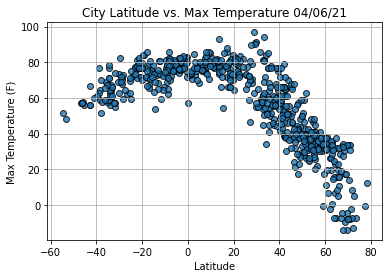

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

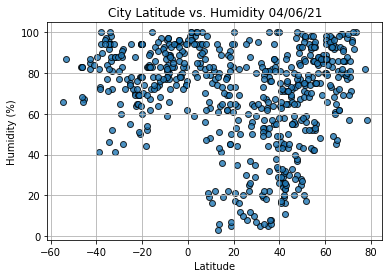

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

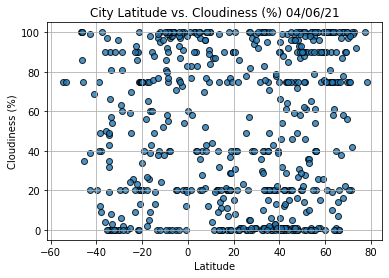

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

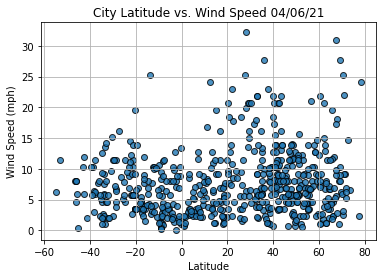

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()